In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmedcurious","key":"e2c882d9356b05f440f4a9433ebdf108"}'}

In [4]:
mkdir kaggle

In [7]:
!chmod 600 /content/kaggle/kaggle.json

In [8]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset

Dataset URL: https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset
License(s): unknown
 98% 774M/787M [00:10<00:00, 122MB/s]
100% 787M/787M [00:10<00:00, 75.3MB/s]


In [9]:
!unzip kaggle-cat-vs-dog-dataset.zip -d cat_vs_dog_dataset

Streaming output truncated to the last 5000 lines.
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: cat_vs_dog_dataset/kagglecatsanddogs_3367a/Pet

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import numpy as np

In [11]:
# Image paths
train_dir = '/content/cat_vs_dog_dataset/kagglecatsanddogs_3367a/PetImages'

# Data augmentation for training to avoid overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,  # Randomly rotate images
    width_shift_range=0.2,  # Horizontally shift images
    height_shift_range=0.2,  # Vertically shift images
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in or out
    horizontal_flip=True,  # Randomly flip images
    validation_split=0.2  # Split for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary',  # Cat or Dog (binary classification)
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


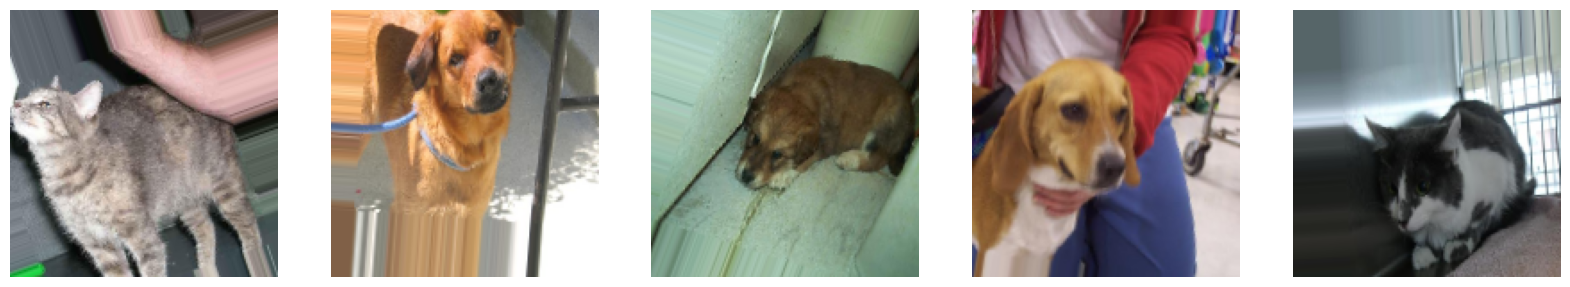

In [12]:
def display_images(generator):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')
    plt.show()

# Display some images from the training set
display_images(train_generator)

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    # Fully connected layer
    Dense(512, activation='relu'),

    # Dropout to reduce overfitting
    Dropout(0.5),

    # Output layer for binary classification (cat vs dog)
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Use EarlyStopping to stop training when validation loss stops improving
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


348/624 ━━━━━━━━━━━━━━━━━━━━ 1:00 218ms/step - accuracy: 0.5389 - loss: 0.7280

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


624/624 ━━━━━━━━━━━━━━━━━━━━ 177s 270ms/step - accuracy: 0.5568 - loss: 0.7056 - val_accuracy: 0.6127 - val_loss: 0.6544
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6452 - val_loss: 0.6675
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 186s 267ms/step - accuracy: 0.6502 - loss: 0.6287 - val_accuracy: 0.6683 - val_loss: 0.6016
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6774 - val_loss: 0.6038
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 201s 266ms/step - accuracy: 0.6965 - loss: 0.5774 - val_accuracy: 0.7002 - val_loss: 0.5654
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7097 - val_loss: 0.6674
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 204s 269ms/step - accuracy: 0.7182 - loss: 0.5553 - val_accuracy: 0.7367 - val_loss: 0.5269
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7419 - val_loss: 0.5543
Epoch 9/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 172s 274ms/step - accurac

In [15]:
# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc}")
print(f"Validation Loss: {val_loss}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 34s 221ms/step - accuracy: 0.7732 - loss: 0.4828
Validation Accuracy: 0.7613704800605774
Validation Loss: 0.49648186564445496


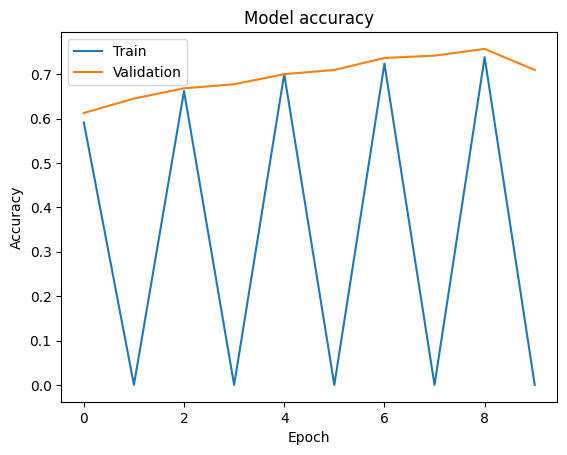

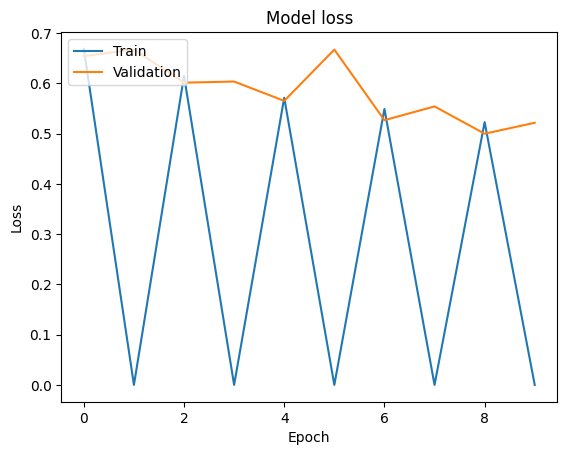

In [16]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()